# IN3050/IN4050 2025: Week 05, Perceptron
### Introduction
The goal of this week's exercise set is to get familiar with the perceptron classifier.
The set has two parts.
The first part does not involve programming or Python.
The questions in this part are the type of questions you will meet at the exam.
They can (and should) be solved by pen and paper or a word processor and, eventually, a calculator.

The second part involves implementations in Python.

## Part 1: Exam type exercises

### Exercise I
You want to predict if movies will be profitable based on their screenplays. You hire two critics A and B to read a script you have and rate it on a scale of 1 to 6. The critics are not perfect; here are five data points including the critics' scores and the performance of the movie:
```
| Movie # | Alice    | Bob       | Profitable? |
|  _______|__________|___________|_____________|
|  1      | 1        | 1         |      no     |
|  _______|__________|___________|_____________|
|  2      | 4        | 3         |      yes    |
|  _______|__________|___________|_____________|
|  3      | 3        | 5         |      yes    |
|  _______|__________|___________|_____________|
|  4      | 5        | 6         |      yes    |
|  _______|__________|___________|_____________|
|  5      | 2        | 3         |      no     |
|  _______|__________|___________|_____________|
```
Is the data linearly separable? Plot the data on a sheet of paper; label profitable movies with + and non-profitable movies with x and determine if the data are linearily separable.


**Answer:** The profitable movies tend to be in the upper-right region and the non proftibale movies tend to be in the lower-left region. So yes, we can draw a straight line that separated these two groups, 

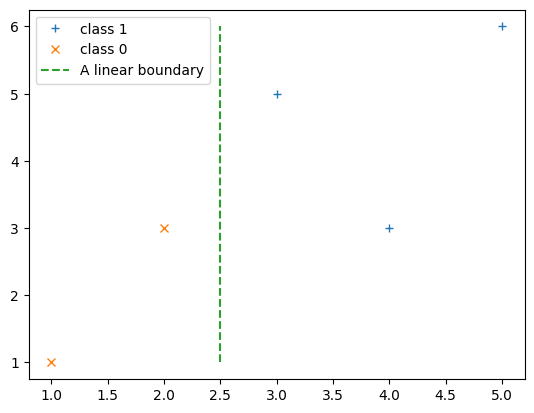

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = [(1,1), (4,3), (3,5), (5,6), (2,3)]
t = [0, 1, 1, 1, 0]
cl = {0:[], 1:[]}
for (a, b) in zip(X, t):
    cl[b].append(a)
plt.plot([a[0] for a in cl[1]], [a[1] for a in cl[1]], '+', label="class 1")
plt.plot([a[0] for a in cl[0]], [a[1] for a in cl[0]], 'x', label="class 0")
plt.plot([2.5, 2.5], [1,6], '--', label="A linear boundary")
plt.legend()


### Exercise II

You decide to use a perceptron to classify your data. 
Suppose you directly use the scores given above as features,
$x_1=$ score given by A and $x_2=$ score given by B.
You also add a bias term in position 0, $x_0=-1$.

Run one pass through the data with the perceptron algorithm, filling out the table below. 
Go through the data points in order, e.g., using data from movie 1 at step 1. 
Suppose we start with the weights $(w_0, w_1, w_2)=(1,0,0)$. 
Use $1$ as learning rate.

For each of the 5 steps, write the 
the score, and whether the prediction is correct.
Calculate the new weights, enter them at the next line and repeat.

```
| Step | Weights    | Score                     | Correct prediction? |
_______|____________|___________________________|______________________|
|  1   | (1, 0, 0)  | 1*(-1) + 0*1 + 0 * 1 = -1 |      yes             |
_______|____________|___________________________|______________________|
|  2   |(1, 0, 0)   | 1*(-1) + 0*4 + 0 * 3 = -1 |           no         |
_______|____________|___________________________|______________________|
|  3   | (2,4,3)    |2*(-1) + 4*3 + 3*5 = 25    |         yes          |
_______|____________|___________________________|______________________|
|  4   |(2,4,3)     |2*(-1)+ 4*5 + 3*6 = 35     |       yes            |
_______|____________|___________________________|______________________|
|  5   |(2,4,4)     | 2*(-1)+4*2+3*3=13         |      no              |
_______|____________|___________________________|______________________|
|      |            |
|______|____________|

```

### Exercise III
Have weights been learned that separate the data? 
Plot the data together with the decision boundary given by the weigths which you are left with after you have run all the data points the first round in the previous question.

No, this is obvious if you consider the plot. 

The formula for the the decison boundary is $w_0x_0 + w_1x_1 + w_2x_2 = 0$.
Inserting the weights $(w_0, w_1, w_2)=(1,2,0)$ and $x_0=-1$ yields $1*(-1)+2x_1 + 0x_2 = 0$, which can be written
$x_1=\frac{1}{2}$.


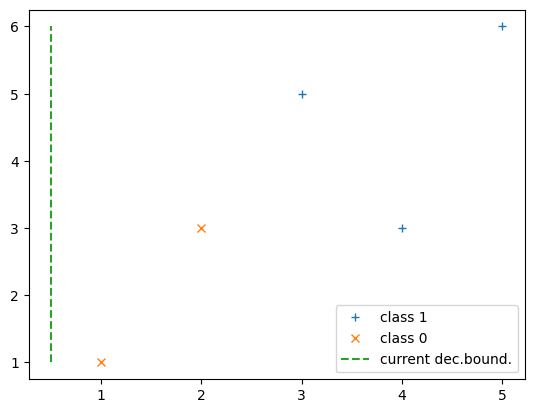

In [2]:
X = [(1,1), (4,3), (3,5), (5,6), (2,3)]
t = [0, 1, 1, 1, 0]
cl = {0:[], 1:[]}
for (a, b) in zip(X, t):
    cl[b].append(a)
plt.plot([a[0] for a in cl[1]], [a[1] for a in cl[1]], '+', label="class 1")
plt.plot([a[0] for a in cl[0]], [a[1] for a in cl[0]], 'x', label="class 0")
plt.plot([0.5, 0.5], [1, 6], '--', label="current dec.bound.")
plt.legend()

### Exercise IV
More generally, irrespective of the training data, you want to know if your features are powerful enough to allow you to handle a range of scenarios. Which of the following scenarios can a perceptron using the features above  indeed perfectly classify movies which are profitable according to the given rules:

1. Your reviewers are awesome: if the total of their scores is more than 8, then the movie will definitely be profitable, and otherwise it won't be.

2. Your reviewers are art critics. Your movie will be profitable if and only if each reviewer gives either a score of 3 or a score of 4.

3. Your reviewers have weird but different tastes. Your movie will be profitable if and only if both reviewers agree.



**Answer**:
1. Can classify.
2. Cannot classify.
3. Cannot classify. 

## Part 2: Implementing the Perceptron Classifier

### Exercise V
We will implement the perceptron classifier. We will implement it as a class similarly to how we implemented the *k*NN-classifier last week. You should implement the two methods `fit` and `predict`. You don't need an `__init__` method. You may include other methods if you find them convenient.

The main part of the perceptron classifier is the `fit` method that trains the perceptron.
`eta` is the learning rate.
One `epoch` is a run through all the training data.
We have set the default to one epoch, but you might need more.
Remember to add the bias to the data.

In [4]:
class PyClassifier():
    """Common methods to all python classifiers --- if any
    
    Nothing here yet"""
    


In [17]:
class PyPerClassifier(PyClassifier):
    """Simple perceptron python classifier"""
    
    def fit(self, X_train, y_train, eta=1, epochs=1, bias=-1):
        """Train the self.weights on the training data with learning
        rate eta, running epochs many epochs"""
        self.bias = bias
        X_train = [[bias]+list(x) for x in X_train] # Put bias in position 0      
        self.dim = dim = len(X_train[0])
        self.weights = weights = [0 for _ in range(dim)]
        # Initialize all weights to 0. 

        for e in range(epochs):
            for x, t in zip(X_train, y_train):
                y = int(self.forward(x)>0)
                for i in range(dim):
                    weights[i] -= eta * (y - t) * x[i]
        
    def forward(self, x):
        """Calculate the score for one item x"""
        return sum([self.weights[i]*x[i] for i in range(self.dim)])       
    
    def predict_one(self, x):
        """Predict the class for the item x"""
        x = [self.bias] + list(x)
        return int(self.forward(x) > 0)
    
    def predict(self, X):
        """Predict the class for the items (in the list) X"""
        return [self.predict_one(z) for z in X]


## Dataset
We will train and test the classifier on the same sythetic dataset as we used for the *k*NN last week.

In [7]:
from sklearn.datasets import make_blobs
import pylab as plt
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X1 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t1 = [y_np[i] for i in range(X_np.shape[0])]

In [8]:
def show(X, y, marker='.'):
    labels = set(y)
    cl = {lab : [] for lab in labels}
    # cl[lab] shall contain the datapoints labeled lab
    for (a, b) in zip(X, y):
        cl[b].append(a)
    for lab in labels:
        plt.plot([a[0] for a in cl[lab]], [a[1] for a in cl[lab]], 
                 marker, label="class {}".format(lab))
    plt.legend()

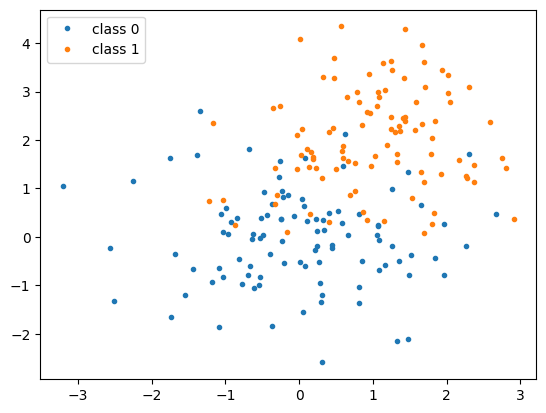

In [9]:
show(X1, t1)

In [10]:
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)
X2 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t2 = [y_np[i] for i in range(X_np.shape[0])]

### Exercise VI
Train PyPerClassifier on  X1, t1 and test on X2, t2 as with the *k*NN-classifier. Try various numbers of epochs and see whether it makes a difference.

Is X2, t2 linearly separable?

How does the results compare to the *k*NN classifier from last week?


**Answer:** The classifier achive 81-83.5% accuaracy on the test set, and performce best on 1 and 100 epochs.
Compared to kNN: The preceptron performnce is likely lowe than kNN beacuse it can only crate linear decision boundaries, while this dataset appers to require non-linear separation.        

In [18]:
def accuracy(y, t):
    """Calculate the accuracy"""
    equal = len([(p, g) for (p,g) in zip(y, t) if p==g])
    return equal / len(t)

In [19]:
for i in range(1,20):
    cl = PyPerClassifier()
    cl.fit(X1,t1,eta = 1, epochs = i)
    test = accuracy(cl.predict(X2), t2)
    print("Accuracy after {:2} epochs, test: {:6.3f}".format(
    i, test))

Accuracy after  1 epochs, test:  0.835
Accuracy after  2 epochs, test:  0.840
Accuracy after  3 epochs, test:  0.815
Accuracy after  4 epochs, test:  0.835
Accuracy after  5 epochs, test:  0.835
Accuracy after  6 epochs, test:  0.815
Accuracy after  7 epochs, test:  0.825
Accuracy after  8 epochs, test:  0.825
Accuracy after  9 epochs, test:  0.825
Accuracy after 10 epochs, test:  0.825
Accuracy after 11 epochs, test:  0.825
Accuracy after 12 epochs, test:  0.820
Accuracy after 13 epochs, test:  0.830
Accuracy after 14 epochs, test:  0.825
Accuracy after 15 epochs, test:  0.820
Accuracy after 16 epochs, test:  0.820
Accuracy after 17 epochs, test:  0.815
Accuracy after 18 epochs, test:  0.825
Accuracy after 19 epochs, test:  0.805


### Exercise VII: Termination and Weights

- Modify the *fit*-method of the classifier such that training halts when there are no more updates, and it is possible to inspect how many epochs it took.
- Run this on the five points film critics dataset. How many epochs does it take to reach completion?
- What are the final weights? Can you plot the decision boundary that corresponds to these weights together with the data set?

In [20]:
class PyPerClassifier_6(PyClassifier):
    """Simple perceptron Python classifier
    
    Stop on convergence.
    """

    def fit(self,X_train, y_train, eta=1, epochs=1, weights=False, bias=-1, trace=True):
        """Include a parameter for weights which makes it possible to 
        initialize the weights manually.
        """
        self.bias = bias
        X_train = [[bias]+list(x) for x in X_train]
        self.dim = dim = len(X_train[0])
        if not weights: weights = [0 for _ in range(dim)]
        self.weights = weights

        e = 0
        converged = False
        updated = 0
        while e < epochs and not converged:
            converged = True
            e += 1
            for x, t in zip(X_train,y_train):
                y = int(self.forward(x)>0)
                for i in range(dim):
                    weights[i] += eta * (t-y) * x[i]
                if y != t:
                    update +=1
                    converged = False
            if trace:
                if converged:
                    print("Training completed with convergence")
                else:
                    print("Training completed without convergence")
                print("Number of epochs: {}, number of updates: {}". format(
                    e, updated))
                
            def forward(self,x):
                return sum([self.weights[i]*x[i] for i in range(self.dim)])
            
            def predict_one(self,x):
                x = [self.bias] + list(x)
                return int(self.forward(x) > 0)
            
            def predict(self,X):
                return [self.predict_one(z) for z in X]
             